# Exploratory data analysis on the [titanic](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) datasets

## Introduction

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crews. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this notebook, we will explore what characteristics do survivors share.

## What characterics do survivors have?

### First glance at the data

In [18]:
# import libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import warnings
import seaborn as sns
from collections import Counter
import numpy as np
warnings.filterwarnings("ignore")

In [19]:
# Get the data
url = "https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv"
data = pd.read_csv(url)

In [20]:
# First look
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Our dataset has 891 entries with the following variables:
  - PassengerId: an integer value that represents the passenger's Id.
  - Survived: an integer value 0 or 1 that indicates whether the passenger survived(1) or not (0).
  - Pclass: an integer value that represents the ticket class.
  - Name: a string value that represents the passenger's name.
  - Sex: a string value that represents the passenger's gender.
  - Age: a decimal value that represents the passenger's age.
  - SibSp: an integer value that represents the passenger's number of siblings and/or spouse aboard the Titanic.
  - Parch: an integer value that represents the passenger's number of parent and/or children aboard the Titanic.
  - Ticket: a string value that represents the passenger's ticket number.
  - Fare: a decimal value that represents the passenger's fare.
  - Cabin: a string value that represents the passenger's cabin.
  - Embarked: a string value that represents the passenger's port of embarkation -
    C = Cherbourg, Q = Queenstown, S = Southampton.
    
    
After the first glance at our data, the following variables have some missing values: 
 - Age
 - Cabin
 - Embarked

Let's further investigate them to see if we can replace those missing values with values representative of the data set.

### Clean the data

#### Fixing 'Age' variable

The 'Sex' variable which represents the passenger's gender has two values: male and female. We will include an additional value called 'child' to represent children. A child is a passenger who is 17 years of age or younger. 

In [22]:
# Add 'child' value in 'Sex' variable 
data['Sex'] = data.apply(lambda row: 'child' if row['Age'] < 18 else row['Sex'], axis=1)

In [23]:
# Retrieve entries with NaN value in 'Age' variable.
null_age = data[data.isnull().Age]

# Retrieve entries with no NaN value in 'Age' variable.
notnull_age = data[data.notnull().Age]

# Get their sizes
null_age_len = null_age.shape[0]
notnull_age_len = notnull_age.shape[0]
total = null_age_len + notnull_age_len

In [24]:
# Print values
print(f"The variable 'Age' has {null_age_len} missing values")
print(f"The variable 'Age' has {notnull_age_len} non missing values")
print(f"The total of missing + non missing values is equal to the total number of entries? {total == data.shape[0]}")

The variable 'Age' has 177 missing values
The variable 'Age' has 714 non missing values
The total of missing + non missing values is equal to the total number of entries? True


In [25]:
# Glance at the entries with NaN value in 'Age' variable
null_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


##### Investigate entries with not NaN values in 'Age' variable

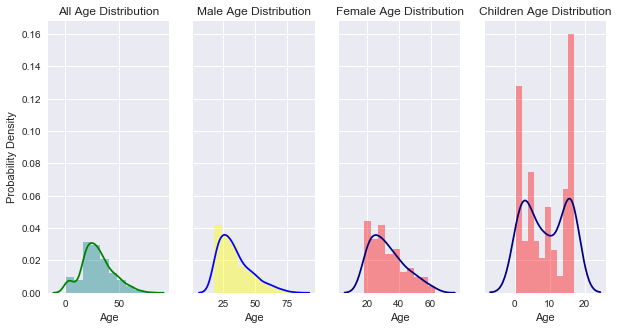

In [26]:
# what is the age distribution?
fig, axs = plt.subplots(ncols=4, sharey=True, figsize=(10, 5))
sns.distplot(notnull_age['Age'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'green'}, ax=axs[0], label='All');
axs[0].set(title='All Age Distribution')
axs[0].set(ylabel='Probability Density')
sns.distplot(notnull_age[notnull_age['Sex']== 'male']['Age'], bins=10,hist_kws={'color': 'yellow'}, kde_kws={'color': 'blue'}, ax=axs[1], label='male' );
axs[1].set(title='Male Age Distribution')
sns.distplot(notnull_age[notnull_age['Sex']== 'female']['Age'],bins=10, hist_kws={'color': 'red'}, kde_kws={'color': 'Navy'}, ax=axs[2], label='female');
axs[2].set(title='Female Age Distribution')
sns.distplot(notnull_age[notnull_age['Sex']== 'child']['Age'], bins=10,hist_kws={'color': 'red'}, kde_kws={'color': 'Navy'}, ax=axs[3], label='child');
axs[3].set(title='Children Age Distribution')
plt.show()

From the figures above, we can infer the followings:
   - 'All Age Distribution' figure has almost a normal distribution.
   - 'Male Age Distribution' and 'Female Age Distribution' figures are right skewed which indicates that they are mostly young adults.
   - 'Children Age Distribution' figure is binomial which indicate that children are mostly either babies or teenagers.
   
Now that we have the differents ages distribution, let's fix the missing values of 'Age' variable in our data. We will use the median value in each gender group.

##### Replace NaN in 'Age' with the median age of the corresponding 'Sex' category

In [27]:
## fixing missing Ages.
### take the median age in each gender category
median_male = np.median(notnull_age[notnull_age['Sex']== 'male']['Age'])
median_female = np.median(notnull_age[notnull_age['Sex']== 'female']['Age'])
median_children = np.median(notnull_age[notnull_age['Sex']== 'child']['Age'])
print(f'The median male adult age in our dataset is {median_male}')
print(f'The median female adult age in our dataset is {median_female}')
print(f'The median child age in our dataset is {median_children}')

### replace missing value in 'Age' with their median
data['Age'] = data.apply(lambda row: median_male 
                                if (np.isnan(row['Age']) & (row['Sex'] == 'male'))
                                else median_female
                                if (np.isnan(row['Age']) & (row['Sex'] == 'female'))
                                else median_child
                                if (np.isnan(row['Age']) & (row['Sex'] == 'female'))
                                else row['Age'], axis=1)

The median male adult age in our dataset is 31.0
The median female adult age in our dataset is 30.25
The median child age in our dataset is 9.0


In [28]:
# check if there is any na in 'Age' variable
any(np.isnan(data['Age']))

False

In [29]:
# let's check our data
index_nan_ages = null_age.index.values
data_with_index_null = data.iloc[index_nan_ages]
data_with_index_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,31.00,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.00,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.25,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,31.00,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.25,0,0,330959,7.8792,NaN,Q


In [30]:
data_with_index_null.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,31.00,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.25,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,31.00,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,31.00,0,0,349217,7.8958,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.25,1,2,W./C. 6607,23.4500,NaN,S


We have successfully replaced all NaN values in 'Age' with their corresponding median age gender group.

#### Fixing 'Cabin' and 'Embarked' variables.

The variable 'Embarked' has only two missing values we will remove those entries. Since we won't use any 'Cabin' value we will remove the 'Cabin' column.

##### Remove the 'Cabin' column and entries which have missing values in 'Embarked' variable.

In [31]:
# Remove the 'Cabin' column
data.drop('Cabin', axis=1, inplace=True)

# Remove entries with NaN value in 'Embarked' 
data.dropna(axis=0, inplace=True)

In [32]:
# Check if we have any missing values in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now, we have a clean dataset.

### Investigate the data
Since the goal of this analysis is to see what variables affect the most passenger's survival rate, we will evaluate each variable against the 'Survived' variable.

In [33]:
# look at the data again
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Who are the survivors?
##### How many survived?

In [34]:
# Survived passengers
survived = Counter(data['Survived'])
print(f'The number of passengers who survived is {survived[1]}')
print(f'The number of passengers who did not survive is {survived[0]}')
print(f'The likelihood of survival of a given passenger is { np.round(survived[1]/ data.shape[0],2)}')

The number of passengers who survived is 340
The number of passengers who did not survive is 549
The likelihood of survival of a given passenger is 0.38


In [35]:
data.groupby(['Survived'])[['PassengerId']].count()

,PassengerId
Survived,
0,549
1,340


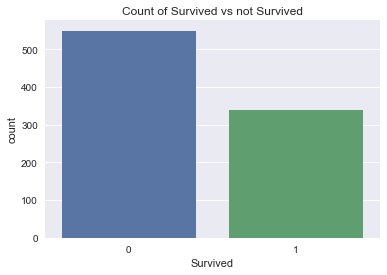

In [36]:
sns.countplot(x="Survived", data=data)
plt.title('Count of Survived vs not Survived')

##### Who is more likely to survive? adult males? adult females? or children?

In [37]:
male_survivors = data[data['Sex'] == 'male']['Survived']
male_survivors_count = Counter(male_survivors)
female_survivors = data[data['Sex'] == 'female']['Survived']
female_survivors_count = Counter(female_survivors)
children_survivors = data[data['Sex'] == 'child']['Survived']
children_survivors_count = Counter(children_survivors)
total_children = sum(children_survivors_count.values())
total_males = sum(male_survivors_count.values())
total_females = sum(female_survivors_count.values())

print(f'The total number of children is {total_children}')
print(f'The number of children who survived is {children_survivors_count[1]}')
print(f'The number of children who did not survive is {children_survivors_count[0]}')
print(f'The likehood of survival of a given child is {np.round(children_survivors_count[1]/data.shape[0], 3)}')
print(f'The likehood of survival of a given child within the child group is {np.round(children_survivors_count[1]/total_children, 3)} ')

print()
print(f'The total number of male passengers is {total_males}')
print(f'The number of male passengers who survived is {male_survivors_count[1]}')
print(f'The number of male passengers who did not survive is {male_survivors_count[0]}')
print(f'The likehood of survival of a given male passenger is {np.round(male_survivors_count[1]/data.shape[0], 3)}')
print(f'The likehood of survival of a given male passenger within the male group is {np.round(male_survivors_count[1]/total_males, 3)} ')

print()
print(f'The total number of female passengers is {total_females}')
print(f'The number of female passengers who survived is {female_survivors_count[1]}')
print(f'The number of female passengers who did not survive is {female_survivors_count[0]}')
print(f'The likehood of survival of a given female passenger is {np.round(female_survivors_count[1]/data.shape[0], 3)}')
print(f'The likehood of survival of a given female passenger within the female group is {np.round(female_survivors_count[1]/total_females, 3)} ')


The total number of children is 113
The number of children who survived is 61
The number of children who did not survive is 52
The likehood of survival of a given child is 0.069
The likehood of survival of a given child within the child group is 0.54 

The total number of male passengers is 519
The number of male passengers who survived is 86
The number of male passengers who did not survive is 433
The likehood of survival of a given male passenger is 0.097
The likehood of survival of a given male passenger within the male group is 0.166 

The total number of female passengers is 257
The number of female passengers who survived is 193
The number of female passengers who did not survive is 64
The likehood of survival of a given female passenger is 0.217
The likehood of survival of a given female passenger within the female group is 0.751 


In [41]:
data.groupby(['Survived', 'Sex'])[['PassengerId']].count()

PassengerId
Survived Sex                
0        child            52
         female           64
         male            433
1        child            61
         female          193
         male             86

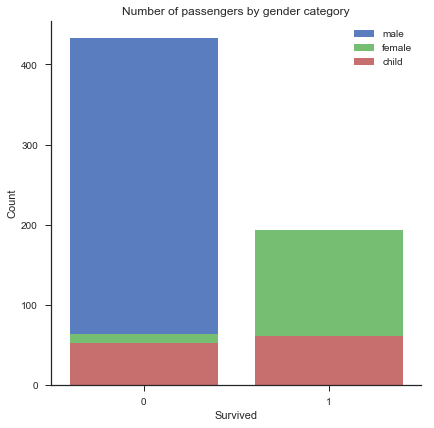

In [42]:
sns.set(style='ticks', color_codes=True)
g = sns.FacetGrid(data, hue='Sex', palette="muted", size=6, sharey=False)
g.map(sns.countplot, 'Survived')
g.set_ylabels("Count")
plt.title('Number of passengers by gender category')
plt.legend()

In [44]:
data.groupby(['Sex'])[['Survived']].mean()

,Survived
Sex,
child,0.539823
female,0.750973
male,0.165703


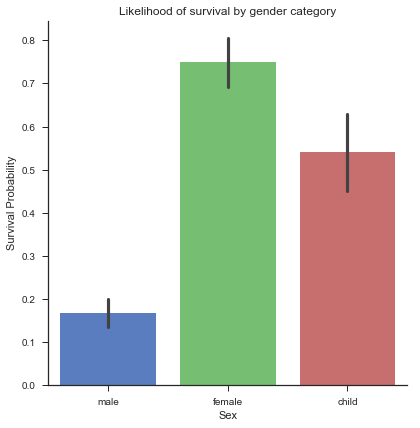

In [45]:
g = sns.factorplot(x="Sex", y='Survived', data=data,
                   size=6, kind="bar", palette="muted")

g.set_ylabels("Survival Probability")
plt.title('Likelihood of survival by gender category')

From the figure 'Number of passengers by gender category' and 'Likelihood of survival by gender category', survivors are mostly adult females with 21.7% and 75.1% chance of survival overall and within the female group respectively, followed by Children with 6.9% and 54% chance of survival overall and within the children group respectively, finally, adult males with 9.7% and 16.6% chance of survival overall and within the male group respectively.

#### Can an upper-class ticket increases a passenger 's likelihood of survival?

##### How many ticket class?

The total number of passengers in class 3 is 491
The total number of passengers in class 1 is 214
The total number of passengers in class 2 is 184


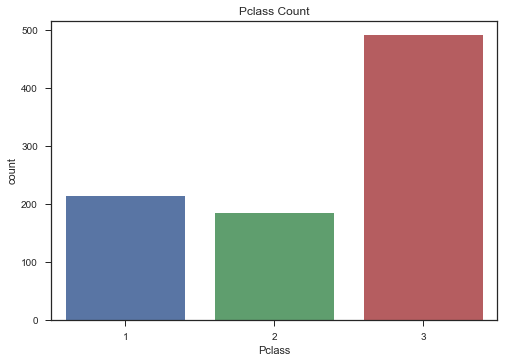

In [46]:
classes = Counter(data['Pclass'])
for elt in classes:
    print(f'The total number of passengers in class {elt} is {classes[elt]}')
    
sns.countplot(x="Pclass", data=data)
plt.title('Pclass Count')

In [49]:
data.groupby(['Pclass', 'Survived'])[['PassengerId']].count()

PassengerId
Pclass Survived             
1      0                  80
       1                 134
2      0                  97
       1                  87
3      0                 372
       1                 119

The majority of passenger in the upper-class 'Pclass=1' has survived. Let's break it by gender

#### Gender group by ticket class

In [52]:
data.groupby(['Pclass', 'Sex'])[['PassengerId']].count()

PassengerId
Pclass Sex                
1      child            12
       female           84
       male            118
2      child            23
       female           64
       male             97
3      child            78
       female          109
       male            304

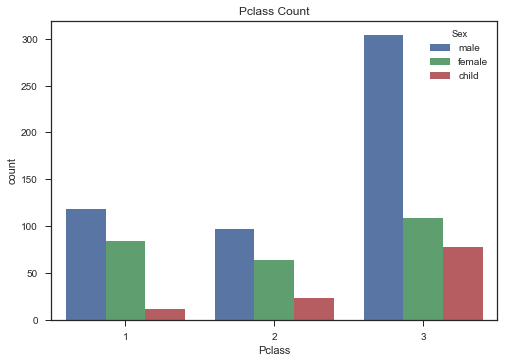

In [53]:
sns.countplot(x="Pclass", hue='Sex', data=data)
plt.title('Pclass Count')

##### Can a ticket class affects a passenger's survival within a gender group?

In [54]:
data.groupby(['Pclass','Survived', 'Sex'])[['PassengerId']].count()

PassengerId
Pclass Survived Sex                
1      0        child             1
                female            2
                male             77
       1        child            11
                female           82
                male             41
2      0        child             2
                female            6
                male             89
       1        child            21
                female           58
                male              8
3      0        child            49
                female           56
                male            267
       1        child            29
                female           53
                male             37

In [55]:
data.groupby(['Pclass', 'Sex'])[['Survived']].mean()

Survived
Pclass Sex             
1      child   0.916667
       female  0.976190
       male    0.347458
2      child   0.913043
       female  0.906250
       male    0.082474
3      child   0.371795
       female  0.486239
       male    0.121711

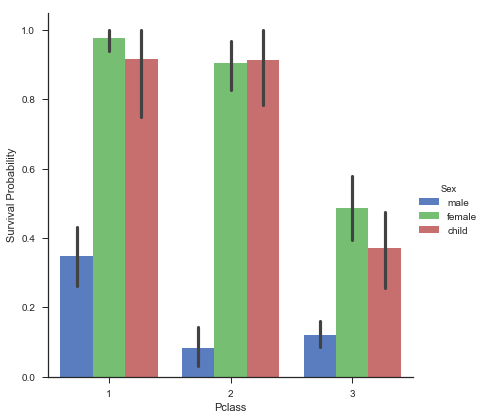

In [56]:
g = sns.factorplot(x="Pclass", y='Survived', hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")

g.set_ylabels("Survival Probability")


From the figure above, the ticket class increases a passenger's chance of survival. Adult males with an upper-class ticket (Pclass value of 1) are more likely to survive than any other adult males with a lower-class ticket (Pclass 2 or 3). Furthermore, adult females and children are more likely to survive if they have an upper-class ticket (Pclass value of 1 or 2).
Given these observations, one might infer that an upper-class ticket (Pclass value of  1) might have a higher 'Fare' value than any lower-class ticket (Pclass value of 2 or Pclass value of 3).

In [58]:
# mean fare by class
data.groupby(['Pclass'])[['Fare']].mean()

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [59]:
# mean fare by gender within a given class
data.groupby(['Pclass', 'Sex'])[['Fare']].mean()

Fare
Pclass Sex               
1      child   108.079858
       female  106.942361
       male     65.570304
2      child    25.963226
       female   21.169206
       male     19.070704
3      child    20.946637
       female   15.281004
       male     11.234303

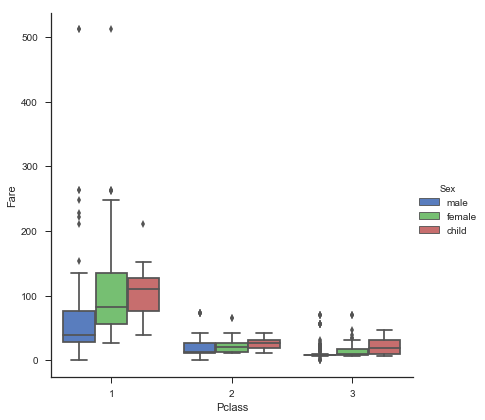

In [60]:
# fare by Pclass
g = sns.factorplot(x="Pclass", y ='Fare', hue="Sex", data=data,
                   size=6, kind="box", palette="muted")

Children and women in all class pay an higher fare than men. We do see a huge difference in fare in Pclass class 1. adult female and children pay 40 more than men for their fare. Maybe this huges difference in price can be attributed to an additional security serviced and tools that they need to buy.

The figure above confirms our findings, upper-class tickets have higher 'Fare' value than any lower-class ticket. 

#### Does having a parent or children increase a passenger's survival rate within the gender group?

In [11]:
data.groupby(['Parch', 'Sex'])[['Survived']].mean()

Survived
Parch Sex             
0     child   0.500000
      female  0.785311
      male    0.166311
1     child   0.613636
      female  0.756098
      male    0.212121
2     child   0.500000
      female  0.700000
      male    0.071429
3     child   0.000000
      female  0.750000
4     female  0.000000
      male    0.000000
5     female  0.250000
      male    0.000000
6     female  0.000000

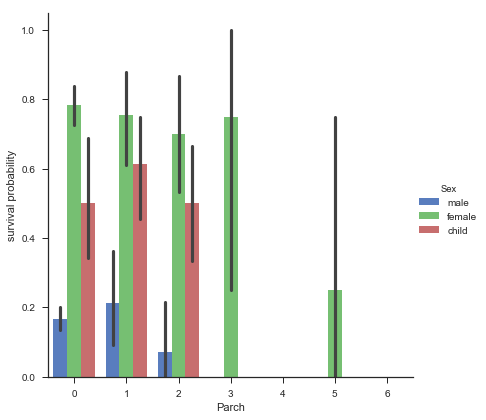

In [61]:
g = sns.factorplot(x="Parch", y='Survived', hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")

g.set_ylabels("survival probability")

Adult females with at most 3 children and/or at most two parents combined are more likely to survive.  Children are more likely to survive regardless whether or not they are traveling with their parents. Among adult males, only the one with at most one children or parent are more likely to survive.

#### Does having a siblings increase a passenger's survival rate within the gender group?

In [12]:
data.groupby(['SibSp', 'Sex'])[['Survived']].mean()

Survived
SibSp Sex             
0     child   0.651163
      female  0.780000
      male    0.156627
1     child   0.757576
      female  0.747253
      male    0.223529
2     child   0.714286
      female  0.750000
      male    0.153846
3     child   0.000000
      female  0.571429
      male    0.000000
4     child   0.166667
5     child   0.000000
8     female  0.000000
      male    0.000000

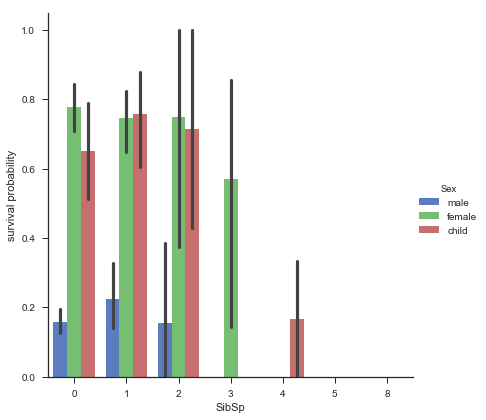

In [611]:
g = sns.factorplot(x="SibSp", y='Survived', hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")

g.set_ylabels("survival probability")


Adult females and children with at most 3 siblings are more likely to survive with a survival rate greater than 0.5.  Adult males with one sibling are more likely to survive. Children with more than 4 siblings are less likely to survive with the survival rate below 0.2.

#### Can the port of embarkation increase a passenger's survival rate within the gender group?

In [13]:
data.groupby(['Embarked', 'Sex'])[['Survived']].mean()

Survived
Embarked Sex             
C        child   0.750000
         female  0.892857
         male    0.284091
Q        child   0.428571
         female  0.727273
         male    0.081081
S        child   0.487805
         female  0.708333
         male    0.147208

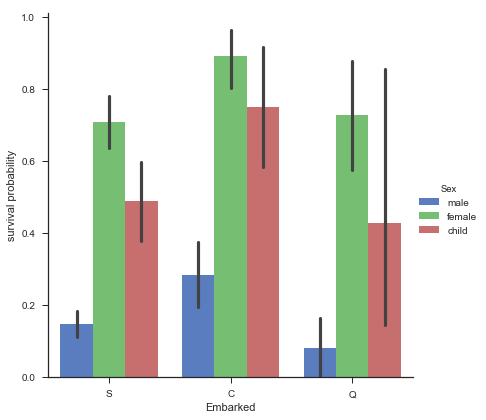

In [612]:
g = sns.factorplot(x="Embarked", y='Survived', hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")

g.set_ylabels("survival probability")

Passengers who have embarked in 'Cherbourg' have the highest rate of survival within their gender group.

#### Can a higher fare increases a passenger's survival rate within the gender group?

In [62]:
data.groupby(['Survived', 'Sex'])[['Fare']].mean()

Fare
Survived Sex              
0        child   26.954890
         female  20.663675
         male    21.751941
1        child   34.857310
         female  55.342703
         male    41.671998

In [63]:
data.groupby(['Survived', 'Sex'])[['Fare']].median()

Fare
Survived Sex            
0        child   27.9000
         female  14.4542
         male     8.6625
1        child   20.5250
         female  26.0000
         male    26.3375

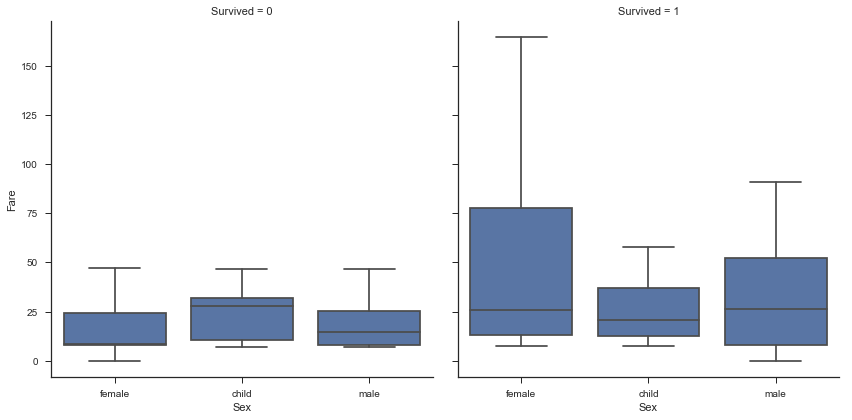

In [64]:
g = sns.FacetGrid(data, col='Survived', palette="muted", size=6)
g.map(sns.boxplot, 'Sex', 'Fare', showfliers=False)
plt.legend()

From the above figure, it emerges that women who survived have bought higher fare ticket than the one that did not. Let's investigate further.

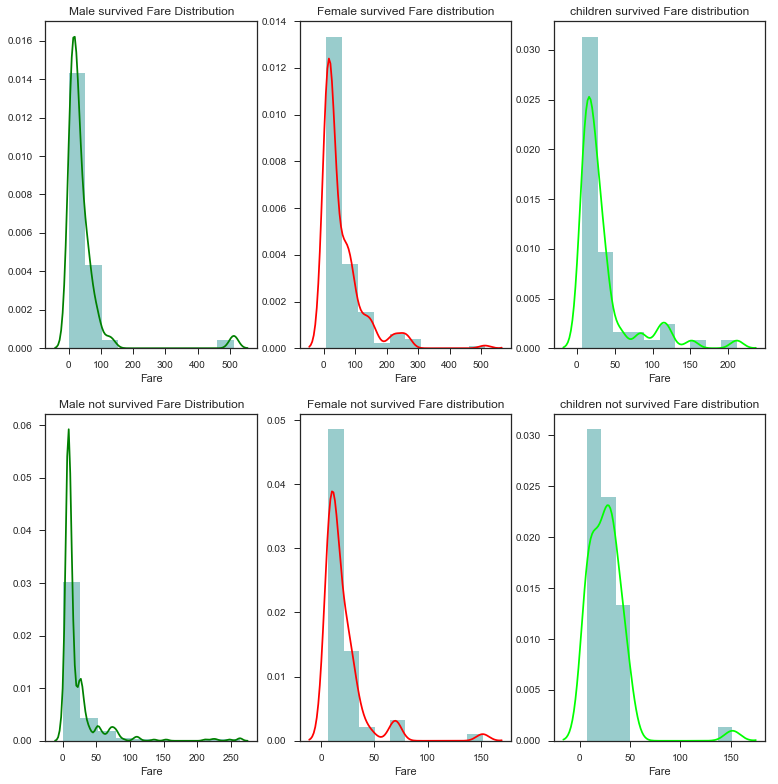

In [615]:
# females
female_survived = data[(data['Sex'] == 'female')&(data['Survived'] == 1)]
female_not_survived = data[(data['Sex'] == 'female')&(data['Survived'] == 0)]

# males
male_survived = data[(data['Sex'] == 'male')&(data['Survived'] == 1)]
male_not_survived = data[(data['Sex'] == 'male')&(data['Survived'] == 0)]

# children
children_survived = data[(data['Sex'] == 'child')&(data['Survived'] == 1)]
children_not_survived = data[(data['Sex'] == 'child')&(data['Survived'] == 0)]

fig, axs = plt.subplots(ncols=3,nrows=2,  figsize=(10, 5), squeeze=False)
sns.distplot(male_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'green'}, ax=axs[0,0], label='All');
axs[0,0].set(title='Male survived Fare Distribution')
sns.distplot(female_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'red'}, ax=axs[0,1], label='All');
axs[0,1].set(title='Female survived Fare distribution')
sns.distplot(children_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'lime'}, ax=axs[0,2], label='All');
axs[0,2].set(title='children survived Fare distribution')


sns.distplot(male_not_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'green'}, ax=axs[1,0], label='All');
axs[1,0].set(title='Male not survived Fare Distribution')
sns.distplot(female_not_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'red'}, ax=axs[1,1], label='All');
axs[1,1].set(title='Female not survived Fare distribution')
sns.distplot(children_not_survived['Fare'], hist_kws={'color': 'Teal'},bins=10, kde_kws={'color': 'lime'}, ax=axs[1,2], label='All');
axs[1,2].set(title='children not survived Fare distribution')

plt.subplots_adjust(bottom=0.001, top=2, left=1, right=2)

plt.show()


From the previous boxplot, even though adult females with higher fare ticket seem to be more likely to survive, the density plots above show that there is not a significant difference in fare between women who survived and women who did not. additional fare ticket does not affect much the survival rate in adult males and children.

##### Let's investigate the male group further

##### Adult males with a fare higher than 100

In [618]:
## let's look how many male with fare > 100 have survived
males_higher_fare = data[(data['Fare'] > 100)&(data['Sex'] == 'male')][
    ['Age', 'Fare', 'Pclass', 'Survived']]
total_males = data[data['Sex'] == 'male'].shape[0]
male_higher_fare_count = Counter(males_higher_fare.Survived)
print(f'The total number of adult males with a fare higher than 100 is { sum( male_higher_fare_count.values())}')
print(f'The number of adult males with a fare higher than 100 who survived is {male_higher_fare_count[1]}')
print(f'The number of adult males with a fare higher than 100 who did not survived is {male_higher_fare_count[0]}')
print(f'The number of adult males with a fare more than 100 have a {np.round(male_higher_fare_count[1]*100 /total_males, 3)}% chance of survival within the male group')


The total number of adult males with a fare higher than 100 is 16
The number of adult males with a fare higher than 100 who survived is 4
The number of adult males with a fare higher than 100 who did not survived is 12
The number of adult males with a fare more than 100 have a 0.771% chance of survival within the male group


##### Adult males with a fare between 50 and 100

In [623]:
male_50_100_fare  = data[((data['Fare'] <= 100) & (data['Fare'] > 50)) &
                          (data['Sex'] == 'male')][['Age', 'Fare', 'Pclass', 'Survived']]

male_50_100_fare_count = Counter(male_50_100_fare.Survived)
print(f'The total number of males with a fare between 50 and 100 is { sum( male_50_100_fare_count.values())}')
print(f'The number of adult males with a fare between 50 and 100 who survived is {male_50_100_fare_count[1]}')
print(f'The number of adult males with a fare between 50 and 100 who did not survived is {male_50_100_fare_count[0]}')
print(f'The number of adult males with a fare between 50 and 100 have a {np.round(male_50_100_fare_count[1]*100 /total_males, 3)} % chance of survival within the male group')


The total number of males with a fare between 50 and 100 is 53
The number of adult males with a fare between 50 and 100 who survived is 19
The number of adult males with a fare between 50 and 100 who did not survived is 34
The number of adult males with a fare between 50 and 100 have a 3.661 % chance of survival within the male group


##### Adult males with a fare between 25 and 50

In [624]:
male_25_50_fare  = data[((data['Fare'] < 50) & (data['Fare'] > 25)) &
                          (data['Sex'] == 'male')][['Age', 'Fare', 'Pclass', 'Survived']]

male_25_50_fare_count = Counter(male_25_50_fare.Survived)
print(f'The total number of males with a fare between 25 and 50 is { sum( male_25_50_fare_count.values())}')
print(f'The number of adult males with a fare between 25 and 50 who survived is {male_25_50_fare_count[1]}')
print(f'The number of adult males with a fare between 25 and 50 who did not survived is {male_25_50_fare_count[0]}')
print(f'The number of adult males with a fare between 25 and 50 have a {np.round(male_25_50_fare_count[1]*100 /total_males, 3)} % chance of survival among males')


The total number of males with a fare between 25 and 50 is 84
The number of adult males with a fare between 25 and 50 who survived is 24
The number of adult males with a fare between 25 and 50 who did not survived is 60
The number of adult males with a fare between 25 and 50 have a 4.624 % chance of survival among males


##### Adult males with a fare between 10 and 25

In [625]:
male_10_25_fare  = data[((data['Fare'] <= 25) & (data['Fare'] > 10)) &
                          (data['Sex'] == 'male')][['Age', 'Fare', 'Pclass', 'Survived']]

male_10_25_fare_count = Counter(male_10_25_fare.Survived)
print(f'The total number of males with a fare between 10 and 25 is { sum( male_10_25_fare_count.values())}')
print(f'The number of adult males with a fare between 10 and 25 who survived is {male_10_25_fare_count[1]}')
print(f'The number of adult males with a fare between 10 and 25 who did not survived is {male_10_25_fare_count[0]}')
print(f'The number of adult males with a fare between 10 and 25 have a {np.round(male_10_25_fare_count[1]*100 /total_males, 3)} % chance of survival within the male group')


The total number of males with a fare between 10 and 25 is 106
The number of adult males with a fare between 10 and 25 who survived is 12
The number of adult males with a fare between 10 and 25 who did not survived is 94
The number of adult males with a fare between 10 and 25 have a 2.312 % chance of survival within the male group


##### Adult males with a fare less than 10

In [626]:
male_0_10_fare  = data[(data['Fare'] <= 10) &
                          (data['Sex'] == 'male')][['Age', 'Fare', 'Pclass', 'Survived']]

male_0_10_fare_count = Counter(male_0_10_fare.Survived)
print(f'The total number of males with a fare less than 10 is { sum( male_0_10_fare_count.values())}')
print(f'The number of adult males with a fare less than 10 who survived is {male_0_10_fare_count[1]}')
print(f'The number of adult males with a fare less than 10 who did not survived is {male_0_10_fare_count[0]}')
print(f'The number of adult males with a fare less than 10 have a {np.round(male_0_10_fare_count[1]*100 /total_males, 3)} % chance of survival within the male group')


The total number of males with a fare less than 10 is 259
The number of adult males with a fare less than 10 who survived is 27
The number of adult males with a fare less than 10 who did not survived is 232
The number of adult males with a fare less than 10 have a 5.202 % chance of survival within the male group


From the investigation above we do see a slight increase in survival rate for males that have
ticket with a fare value less than 100.

## Conclusion

In this notebook, we have investigated the survival rate within gender group, namely: adult males, adult females, and children. From our analysis, it emerges that adult females and children are more likely to survive. Additionally, for adult males, the following increase their survival within the group:
 - A 'Pclass' value of 1.
 - A 'SibSp' value of 1.
 - A 'Parch' value of 1.
 - A 'Embarked' value of 'C'.
 - A 'Fare' value below 100.